# An analysis on saving videos on Tiktok

In [1]:
import pandas as pd
import urllib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Research paper conducted a difference analysis and hashtag similarity analysis
# Pie chart showing authors of the videos the bots interacted with
# Compare hashtags among the active users

In [3]:
control_data = pd.read_csv("/Users/fridahntika/Documents/CS315/CS315_Project1/data/02-12-22-08_control_data_all_videos.csv")
saved_videos = pd.read_csv("/Users/fridahntika/Documents/CS315/CS315_Project1/data/02-12-21-46_save_by_random_data_saved_videos.csv")
exper_data = pd.read_csv("/Users/fridahntika/Documents/CS315/CS315_Project1/data/02-12-21-46_save_by_random_data_all_videos.csv")

In [4]:
control_data

,batch,index,music,hashtag,author,likes,comments,shares,saves
0,1,0,original sound - amber wolf,"gaming, funny, warzone, wz2, callofduty",amberwolf20,102400,787,8342,198
1,1,1,original sound - fr0sty_rick,"fyp%E3%82%B7, relatable, trending, aylecia, bl...",leci.bby,280200,627,15500,164
2,1,2,original sound - REEKON Tools,NaN,reekontools,640300,3854,105200,77500
3,1,3,Epic Inspiration - DM Production,NaN,graciebonr,167500,4142,57700,17500
4,1,4,original sound - Kenayo Frederick,"fyp, fu, freesaucegod, highlightertutorial",nhlfreesaucegod,272100,1622,85100,4342
...,...,...,...,...,...,...,...,...,...
366,1,10,lucid dreams YKARE cover - ykare,"juicewrld, luciddreams, fyp%E3%82%B7%E3%82%9Av...",whyk4re,3800000,18500,353400,73600
367,2,0,som original - WILLTEIXEIRA,"boladeneve, boladenevechurch, batucadaaben%C3%...",willteixeiraofc1,34400,3949,2679,6249
368,2,1,som original - WILLTEIXEIRA,"oucoboimugindo, pragilene, saul, cristaosnotik...",willteixeiraofc1,19200,505,1503,1311
369,2,2,som original - WILLTEIXEIRA,"leandrinha, oinimigotentatederrubar, louvor, g...",willteixeiraofc1,24300,1034,1340,295


In [5]:
exper_data

,batch,index,music,hashtag,author,likes,comments,shares,saves
0,1,0,original sound - ina,NaN,ina.katherine,3400000,30200,226400,94800
1,1,1,original sound - fr0sty_rick,"fyp%E3%82%B7, relatable, trending, aylecia, bl...",leci.bby,280200,627,15500,164
2,1,2,original sound - Taj.Mahal,NaN,kassieemariee,689400,2198,73600,6060
3,1,3,Rock With It by Saucy Santana - Saucy Santana,"fyp, foryou, foryoupage, caseynicola, lgbt, co...",caseynicolaxx,29500,107,855,62
4,1,4,original sound - Jailyne Ojeda,NaN,jailyneojeda,439800,1313,30800,965
...,...,...,...,...,...,...,...,...,...
264,5,4,original sound - JSCM_movies,"movies, foryou, movie, movieclips, fyp",jscm_movies6,587800,19500,110300,12700
265,5,5,original sound - Kenayo Frederick,"fyp, fu, freesaucegod, highlightertutorial",nhlfreesaucegod,270700,1603,81000,4321
266,5,6,original sound - Breckie Hill,@henry_hockey777,breckiehill,214600,1162,20500,694
267,5,7,original sound - MOONTELLTHAT,NaN,moontellthat,500300,4404,20700,4244


### Calculating the Jaccard index of posts, sounds, content creators, and hashtags between the control and active bots

I created a postID column based on the method Eni shared because we do not have such data

In [6]:
def createPostID(row):
    return f"{row['author']}_{row['saves']}"

control_data['postID'] = control_data.apply(createPostID, axis=1)
saved_videos['postID'] = saved_videos.apply(createPostID, axis=1)
exper_data['postID'] = exper_data.apply(createPostID, axis=1)
control_data.head()

,batch,index,music,hashtag,author,likes,comments,shares,saves,postID
0,1,0,original sound - amber wolf,"gaming, funny, warzone, wz2, callofduty",amberwolf20,102400,787,8342,198,amberwolf20_198
1,1,1,original sound - fr0sty_rick,"fyp%E3%82%B7, relatable, trending, aylecia, bl...",leci.bby,280200,627,15500,164,leci.bby_164
2,1,2,original sound - REEKON Tools,NaN,reekontools,640300,3854,105200,77500,reekontools_77500
3,1,3,Epic Inspiration - DM Production,NaN,graciebonr,167500,4142,57700,17500,graciebonr_17500
4,1,4,original sound - Kenayo Frederick,"fyp, fu, freesaucegod, highlightertutorial",nhlfreesaucegod,272100,1622,85100,4342,nhlfreesaucegod_4342


In [7]:
control_posts = control_data['postID']
exper_posts = exper_data['postID']

In [8]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return float(intersection) / union

post_jaccard = jaccard_similarity(control_posts, exper_posts)
post_jaccard

0.04411764705882353

In [9]:
#jaccard similarity of content creators
control_authors = control_data['author']
exper_authors = exper_data['author']
author_jaccard = jaccard_similarity(control_authors, exper_authors)
author_jaccard

0.09306930693069307

In [10]:
#jaccard similarity of sounds
control_music = control_data['music']
exper_music = exper_data['music']
music_jaccard = jaccard_similarity(control_music, exper_music)
music_jaccard

0.09090909090909091

In [11]:
from collections import Counter

allHashtagsCnt = Counter() # global variable that will be changed through the helper function

def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        allHashtagsCnt.update(htList) # method update of Counter takes a list and updates all keys

In [12]:
_ = control_data['hashtag'].apply(countAllHashtags)
_ = saved_videos['hashtag'].apply(countAllHashtags)
_ = exper_data['hashtag'].apply(countAllHashtags)

In [13]:
#creating lists of all the tags in the data sets
def get_tags(df):
    return [tag_list for tag_list in df['hashtag']]

#removing tags that may skew the analysis
removed_tags = ['fyp', 'foryou', 'fy', 'fypage', 'foryoupage', 'foryoupage', 'nan']
        
#clean up tags; decoding and removing
def clean_tags(tag_list):
    for tag in tag_list:
        if type(tag) == str:
            if '%' in str(tag):
                tag1 = urllib.parse.unquote(tag)
                tag_list.append(tag1)
                tag_list.remove(tag)
    return tag_list
        
def remove_tags(tag_list, to_remove):
    return [tag for tag in tag_list if tag not in to_remove and ('fyp' not in str(tag)) and ('foryou' not in str(tag))]

control_tags = get_tags(control_data)
cont_tags = [str(item) for item in control_tags]
con_tags = clean_tags(cont_tags)
control_clean_tags = remove_tags(con_tags, removed_tags)

active_tags = get_tags(exper_data)
activ_tags = [str(item) for item in active_tags]
acti_tags = clean_tags(activ_tags)
active_clean_tags = remove_tags(acti_tags, removed_tags)

In [14]:
#jaccard similarity of hashtags
hashtag_jaccard = jaccard_similarity(control_clean_tags, active_clean_tags)
hashtag_jaccard

0.061611374407582936

### Pie chart showing the top five most interacted with content creators for both bots

In [15]:
def sort_authors(auth_list):
    #creates a dictionary that stores how many times a given content creator appears in the data
    auth_dict = {}
    for author in auth_list:
        if author in auth_dict:
            auth_dict[author] += 1
        else:
            auth_dict[author] = 1
            
    
    #sorts in decreasing order to get the most popular ones
    sorted_authors = sorted(auth_dict.items(), key = lambda item: item[1], reverse = True)
    
    return sorted_authors

exper_sorted_authors = sort_authors(exper_authors)
cont_sorted_authors = sort_authors(control_authors)

In [16]:
#top 5 creators
def get_top_5(data):
    authors = []
    counts = []
    for author, count in data[:5]:
        authors.append(author)
        counts.append(count)
        
    return authors, counts

exper_5_authors, count_data_exper = get_top_5(exper_sorted_authors)
cont_5_authors, count_data_cont = get_top_5(cont_sorted_authors)

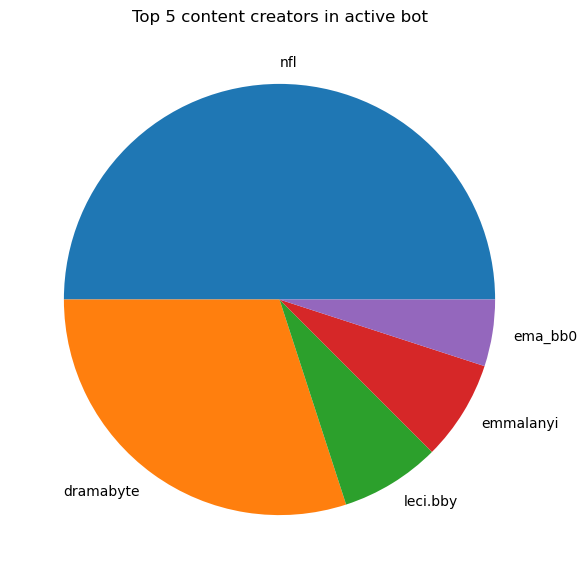

In [17]:
top_5_fig = plt.figure(figsize=(10, 7))
plt.pie(count_data_exper, labels = exper_5_authors)
plt.title('Top 5 content creators in active bot')
plt.show()

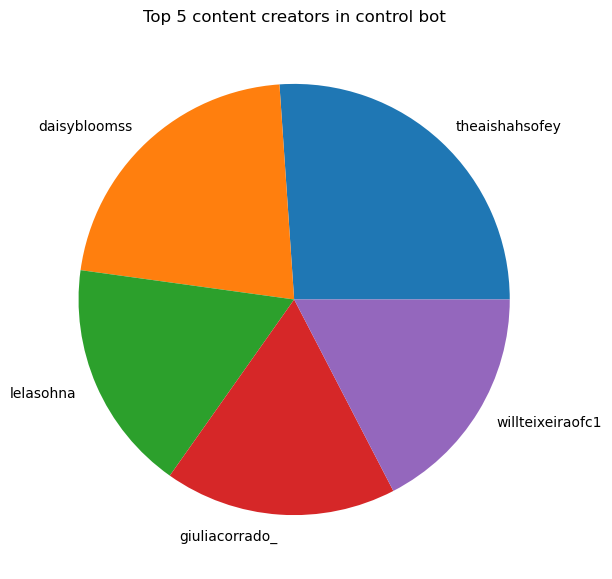

In [18]:
top_5_fig2 = plt.figure(figsize=(10, 7))
plt.pie(count_data_cont, labels = cont_5_authors)
plt.title('Top 5 content creators in control bot')
plt.show()

### Checking if there is a linear relationship between saves and other metrics in data

In [19]:
control_interactions = control_data[['saves', 'likes', 'comments', 'shares']]
exper_interactions = exper_data[['saves', 'likes', 'comments', 'shares']]
control_interactions

,saves,likes,comments,shares
0,198,102400,787,8342
1,164,280200,627,15500
2,77500,640300,3854,105200
3,17500,167500,4142,57700
4,4342,272100,1622,85100
...,...,...,...,...
366,73600,3800000,18500,353400
367,6249,34400,3949,2679
368,1311,19200,505,1503
369,295,24300,1034,1340


In [20]:
#saves_likes_control = sns.regplot(data = control_interactions, x = 'saves', y = 'likes')

In [21]:
#saves_comments_control = sns.regplot(data = control_interactions, x = 'saves', y = 'comments')

In [22]:
#saves_shares_control = sns.regplot(data = control_interactions, x = 'saves', y = 'shares')

In [23]:
#saves_likes_active = sns.regplot(data = exper_interactions, x = 'saves', y = 'likes')

In [24]:
#saves_comments_active = sns.regplot(data = exper_interactions, x = 'saves', y = 'comments')

In [25]:
#saves_shares_active = sns.regplot(data = exper_interactions, x = 'saves', y = 'shares')

It is kind of hard to understand the graphs given the variation in axis units so I standardized them

/Users/fridahntika/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


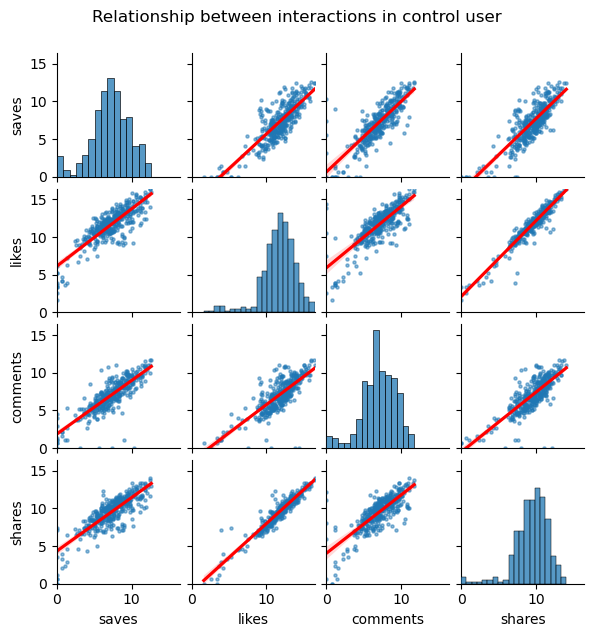

In [26]:
log_interactions = np.log1p(control_interactions)
control_pairplot = sns.pairplot(log_interactions, kind='reg', height=1.5, aspect=1, # control the height of each subplot
             plot_kws={'scatter_kws': {'alpha': 0.5, 's': 5}, 'line_kws': {'color': 'red'}})

globalMin = log_interactions.min().min() # since there are two dimensions in the table, we need to take the min twice
globalMax = log_interactions.max().max()

# Set the same axis limits for all subplots
for i in range(log_interactions.shape[1]): # iterate of the number of columns
    for j in range(log_interactions.shape[1]):
        control_pairplot.axes[i, j].set_xlim(globalMin, globalMax)
        control_pairplot.axes[i, j].set_ylim(globalMin, globalMax)
        
control_pairplot.fig.suptitle('Relationship between interactions in control user', verticalalignment='top', 
                              y=1.05, ha='center')
plt.show()

/Users/fridahntika/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


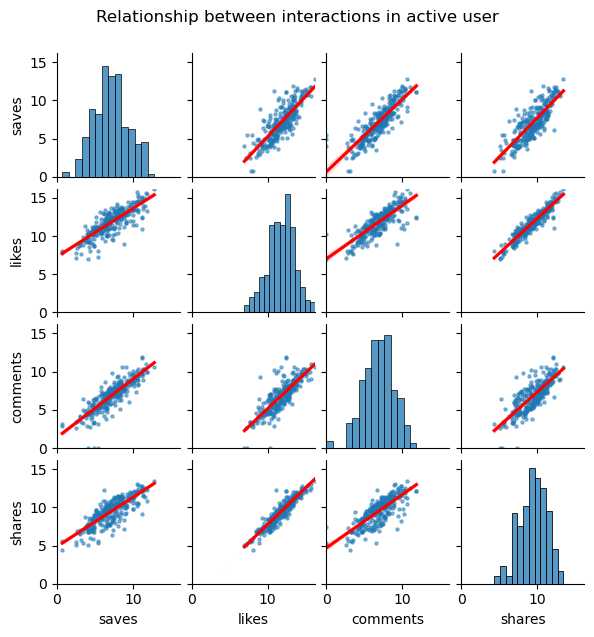

In [27]:
log_interactions_2 = np.log1p(exper_interactions)
exper_pairplot = sns.pairplot(log_interactions_2, kind='reg', height=1.5, aspect=1, 
                              plot_kws={'scatter_kws': {'alpha': 0.5, 's': 5}, 'line_kws': {'color': 'red'}})

globalMin = log_interactions_2.min().min()
globalMax = log_interactions_2.max().max()

# Set the same axis limits for all subplots
for i in range(log_interactions_2.shape[1]): # iterate of the number of columns
    for j in range(log_interactions_2.shape[1]):
        exper_pairplot.axes[i, j].set_xlim(globalMin, globalMax)
        exper_pairplot.axes[i, j].set_ylim(globalMin, globalMax)
        
exper_pairplot.fig.suptitle('Relationship between interactions in active user', verticalalignment='top', 
                            y=1.05, ha='center')
plt.show()